In [1]:
from PIL import Image
import numpy as np
import pandas as pd
import altair as alt

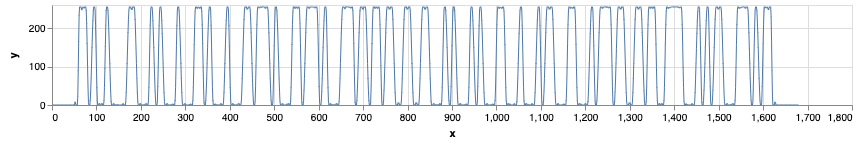

In [7]:
image = Image.open('barcode.jpeg')
width, height = image.size

new_width = width * 4
image = image.resize((new_width, height), Image.ANTIALIAS)

line = image.crop((0, height//2, new_width, height//2+1)).convert('L')
data = np.asarray(line, dtype='int32')[0]

data = 255 - data

df = pd.DataFrame({'x': np.arange(len(data)), 'y': data})

alt.Chart(df).mark_line().encode(
    x='x',
    y='y',
    size=alt.value(1)
).configure_view(
    width=800,
    height=100,
)

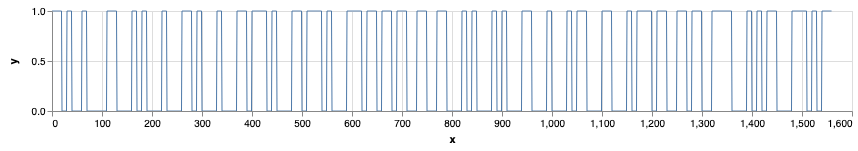

In [6]:
avg = np.average(df['y'])
bits = df['y'].apply(lambda x: 1 if x >= avg else 0).reset_index(drop=True)

start = 0
while True:
    if bits.iloc[start] == 1:
        break
    start = start + 1
    
end = len(bits) - 1
while True:
    if bits.iloc[end] == 1:
        break
    end = end - 1
    
bits = bits.iloc[start:end+1].reset_index(drop=True)

df =pd.DataFrame({'x': np.arange(len(bits)), 'y': bits})
alt.Chart(df).mark_line().encode(
    x='x',
    y='y',
    size=alt.value(1)
).configure_view(
    width=800,
    height=100,
)

In [13]:
zero = False
for idx in range(len(bits)):
    if bits.iloc[idx] == 0:
        zero = True
    if zero and bits.iloc[idx] == 1:
        break    
bit_width = int(idx / 3)

count = []
value = -1
value_count = 0
for item in bits:
    if item != value:
        if value in (0, 1):
            count.append((value, value_count))
        value = item
        value_count = 1
    else:
        value_count = value_count + 1
else:
    count.append((value, value_count))

code = ''.join(str(value)*(value_count//bit_width) for value, value_count in count)

step = 16
end = step
while end < len(code):
    print(code[end:end+8])
    end = end + step

10100010
01000110
11011101
10110110
00101000
00010001
00010111
11001111
10001110
